# 1. Covariance and Correlation

## 1.1. Covariance

The Covariance is a measure of how much two random variables change together. It is calculated as the expected value of the product of the deviations of the variables from their means.

$$
\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]
$$



In [1]:
import statsmodels.api as sm
import numpy as np
# Dice Rolls

X = [2, 3, 2, 1, 3, 5, 1, 1, 3, 1, 4, 5, 5, 2, 5, 6, 3, 5, 3, 6]  # Dice rolls

expected_value_X = np.mean(X)

print(f"Expected value of X: {expected_value_X}")

Expected value of X: 3.3


In [2]:
d = sm.stats.DescrStatsW(X)

print(f"Expected value of X: {d.mean}")
print(f"Covariance of X: {d.cov}")


Expected value of X: 3.3
Covariance of X: 2.81


## 1.2 Computing covariance

$$
\text{Cov}(X, Y) = E[(X - E[X])(Y - E[Y])]
$$

Is equivalent to:

$$
\text{Cov}(X, Y) = E[XY] - E[X]E[Y]
$$



This allows to estimate the covariance of two random variables by calculating the expected value of the product of the random variables minus the product of the expected values of the random variables.

[[34.35023637  1.91418456]
 [ 1.91418456  0.18776061]]


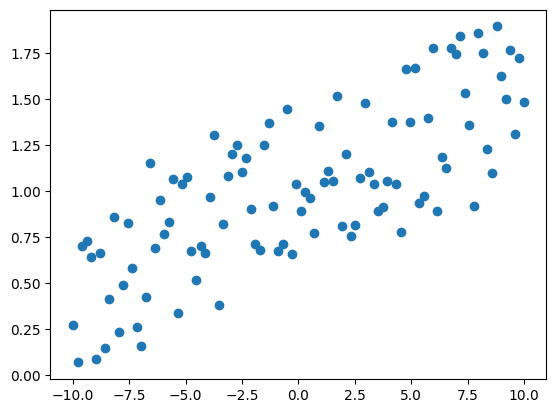

In [6]:
X = np.linspace(-10, 10, 100)
Y = np.random.random(100) + np.linspace(0, 1, 100)
plt.plot(X, Y, 'o')

C = np.cov(X, Y)
print(C)

In [7]:
# Negative Correlation
from scipy import stats

x = np.random.random(100)
y = 1 - x
correlation, p_value = stats.pearsonr(x, y)
print(correlation)

-1.0


In [8]:
# Zero Correlation
x = np.random.random(100)
y = np.random.random(100)
correlation, p_value = stats.pearsonr(x, y)
print(correlation)

# Positive Correlation
x = np.random.random(100)
y = x
correlation, p_value = stats.pearsonr(x, y)
print(correlation)

0.015892452510925262
0.9999999999999999


## 1.3 Dimensionality Analysis

In data, we often have more than two variables. We can use the covariance matrix to understand the relationships between multiple variables.



In [11]:
heights = np.array([178.64530591, 173.06618977, 155.22558268, 186.8983648 ,
       149.16650972, 164.3049925 , 156.8397536 , 166.07190208,
       174.11183283, 155.54411733, 152.61490567, 182.89611452,
       145.79498225, 169.50606044, 157.94949789, 170.43628341,
       175.95694371, 178.09153374, 178.51960883, 173.56347301,
       158.79606688, 168.593175  , 159.88907252, 174.0085056 ,
       172.05981633, 175.79140631, 165.6368616 , 191.2270476 ,
       179.92045118, 153.1153195 ])

weights = np.array([ 88.39616195,  63.77670541,  82.1551606 , 102.81391498,
        54.11862754,  73.19813772,  87.89767135,  77.42374335,
        68.65163289,  81.00977302,  76.8384397 , 119.6155542 ,
        92.78823634,  73.24696289,  72.12448243,  87.41055872,
        88.22139197, 102.50923756,  83.48268745,  82.69144239,
        72.76970268,  96.6186149 ,  81.97160878,  85.20213248,
        95.62580765,  91.80510994,  67.09249674,  86.42500849,
        83.76262709,  71.82791366])

In [12]:
np.cov(heights, weights)[0][1]


np.float64(73.26405232380192)

Note that the covariance value is positive, which means that the variables are positively correlated.

But we can't compare this value with the covariance of other variables because the covariance is not standardized.

## 1.4 Standardizing Covariance

To compare the covariance of different variables, we can standardize the covariance by dividing it by the standard deviation of the variables. This is the Correlation.

$$
\text{Correlation}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

In [15]:
# Calculate the correlation

corr = np.corrcoef(heights, weights)
print(corr)


corr = np.cov(heights, weights) / (np.std(heights) * np.std(weights))
print(corr)

[[1.         0.48062645]
 [0.48062645 1.        ]]
[[0.9099315  0.49719978]
 [0.49719978 1.17608257]]


The values returned by `np.corrcoef` and `np.cov` are different. This is because `np.corrcoef` returns the correlation matrix, while `np.cov` returns the covariance matrix.